In [245]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

### Import dataset Supermarket Customer and display top and bottom 5 data

In [246]:
pd.set_option ('display.max_columns', 100)
df = pd.read_csv ('/content/drive/MyDrive/Purwadhika Data Analyst/Supermarket_Customers.csv')
display(df.head(),df.tail())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,4/9/2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,8/3/2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/2/2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10/6/2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0
2239,9405,1954,PhD,Married,52869.0,1,1,15-10-2012,40,84,3,61,2,1,21,3,3,1,4,7,0,0,0,0,0,0,3,11,1


In [247]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### General information on data

In [248]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

##### We can conclude that our dataset has 2240 of rows and 29 columns. We will check the following later on:

1.   Change the date format in Dt_customer column
2.   Null values
3.   Duplicate values
4.   Outliers




### Check unique sample in our dataset

In [249]:
listItem = []
for col in df.columns :
    listItem.append([df[col].nunique(), df[col].unique()])

dfDesc = pd.DataFrame(columns=['Number of Unique', 'Unique Sample'],
                     data=listItem)

dfDesc

,Number of Unique,Unique Sample
0,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177..."
1,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 198..."
2,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,8,"[Single, Together, Married, Divorced, Widow, A..."
4,1974,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, ..."
5,3,"[0, 1, 2]"
6,3,"[0, 1, 2]"
7,663,"[4/9/2012, 8/3/2014, 21-08-2013, 10/2/2014, 19..."
8,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 8..."
9,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6..."


### Statistical Summary

In [250]:
display(df.describe(), df.describe(include='object'))

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


### 1. Change the date format

In [251]:
def convert_to_dmy(date_str):
    try:
        # First try parsing assuming d/m/Y or d-m-Y formats
        return pd.to_datetime(date_str, format="%d-%m-%Y", dayfirst=True)
    except ValueError:
        # If the above fails, try m/d/Y format and then convert to d-m-Y
        return pd.to_datetime(date_str, format="%m/%d/%Y").strftime('%d-%m-%Y')

# Apply the function to the Dt_Customer column
df['Dt_Customer'] = df['Dt_Customer'].apply(convert_to_dmy)

# Verify the conversion
print(df['Dt_Customer'].head())

0             09-04-2012
1             03-08-2014
2    2013-08-21 00:00:00
3             02-10-2014
4    2014-01-19 00:00:00
Name: Dt_Customer, dtype: object


### 2. Null values

##### We can see from below there are 24 nan values in column "income"

In [252]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, len(df),df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2)])

dfDesc = pd.DataFrame(columns=['Column Name', 'Data Type', 'Data Count', 'Missing Value',
    'Missing Value Percentage'],
                     data=listItem)

dfDesc

,Column Name,Data Type,Data Count,Missing Value,Missing Value Percentage
0,ID,int64,2240,0,0.00
1,Year_Birth,int64,2240,0,0.00
2,Education,object,2240,0,0.00
3,Marital_Status,object,2240,0,0.00
4,Income,float64,2240,24,1.07
5,Kidhome,int64,2240,0,0.00
6,Teenhome,int64,2240,0,0.00
7,Dt_Customer,object,2240,0,0.00
8,Recency,int64,2240,0,0.00
9,MntWines,int64,2240,0,0.00


In [253]:
# checking the rows with missing values
df.loc[df.Income.isna() == True].sample(24)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2061,1612,1981,PhD,Single,NaN,1,0,2013-05-31 00:00:00,82,23,0,15,0,2,7,2,3,0,3,6,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20 00:00:00,19,5,1,3,3,263,362,0,27,0,0,1,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,5,48,6,10,7,3,2,1,4,6,0,0,0,0,0,0,3,11,0
312,2437,1989,Graduation,Married,NaN,0,0,06-03-2013,69,861,138,461,60,30,61,1,6,5,12,3,0,1,0,1,0,0,3,11,0
2078,5079,1971,Graduation,Married,NaN,1,1,03-03-2013,82,71,1,16,0,0,9,4,2,1,3,8,0,0,0,0,0,0,3,11,0
1386,3769,1972,PhD,Together,NaN,1,0,03-02-2014,17,25,1,13,0,0,3,1,1,0,3,7,0,0,0,0,0,0,3,11,0
1379,10475,1970,Master,Together,NaN,0,1,04-01-2013,39,187,5,65,26,20,14,2,4,2,6,5,0,0,0,0,0,0,3,11,0
2084,5250,1943,Master,Widow,NaN,0,0,2013-10-30 00:00:00,75,532,126,490,164,126,126,1,5,5,11,1,0,0,1,0,0,0,3,11,1
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17 00:00:00,57,11,3,22,2,2,6,2,2,0,3,6,0,0,0,0,0,0,3,11,0
1383,4345,1964,2n Cycle,Single,NaN,1,1,01-12-2014,49,5,1,9,2,0,4,1,1,0,2,7,0,0,0,0,0,0,3,11,0


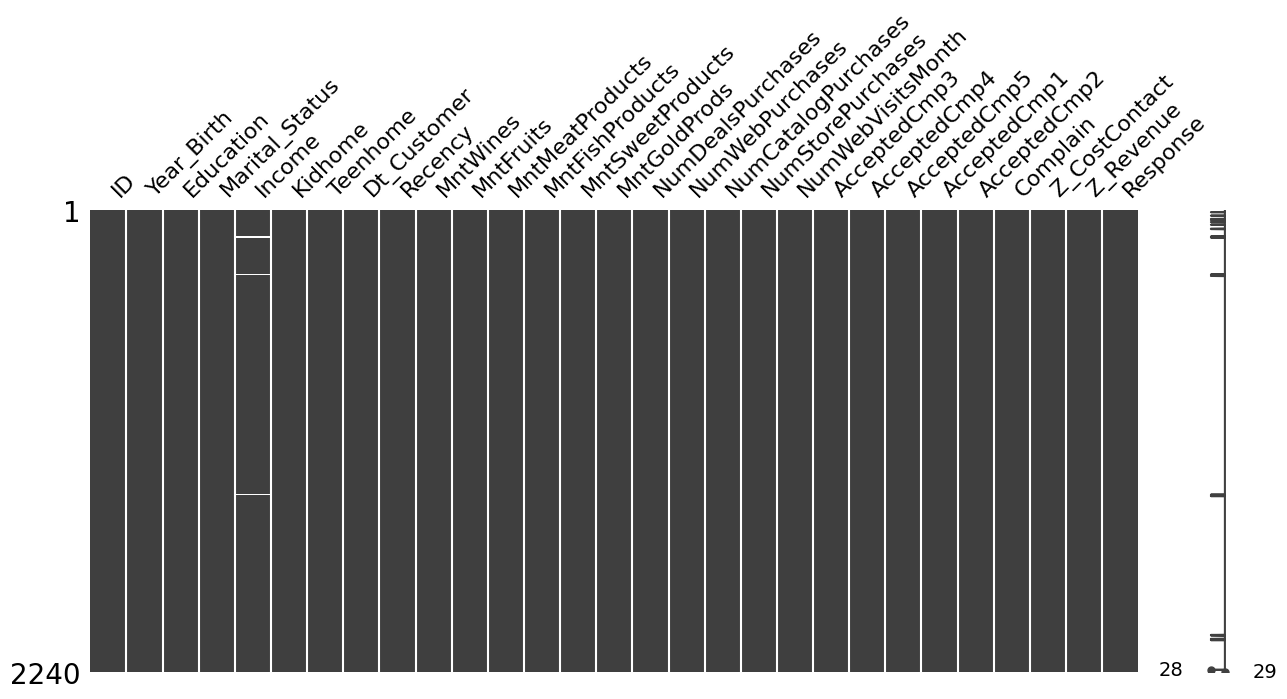

In [254]:
import missingno as msno

# Assuming your dataset is already loaded into a DataFrame called df
msno.matrix(df, figsize=(15, 6))

import matplotlib.pyplot as plt
plt.show()

##### The type of missing values is Missing Completely At Random (MCAR) where probability of data being missing is uniform across all observations with no relationship between the missingness of data and any other observed or unobserved data within the dataset.

##### Although the missing data only weights about 1% of the data, we will replace these missing values with median.

In [255]:
# Calculate the median of the 'Income' column (excluding missing values)
median_income = df['Income'].median()

# Fill missing values in the 'Income' column with the median
df['Income'].fillna(median_income, inplace=True)

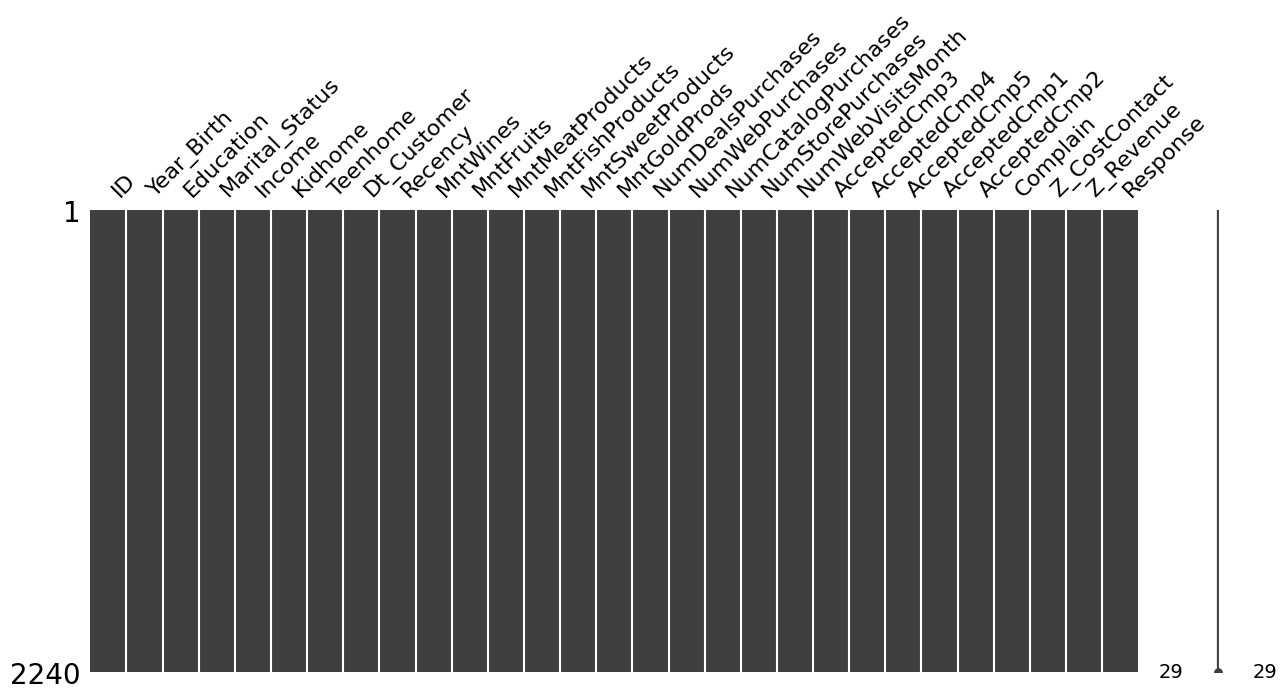

In [256]:
# Assuming your dataset is already loaded into a DataFrame called df
msno.matrix(df, figsize=(15, 6))

import matplotlib.pyplot as plt
plt.show()

### 3. Duplicate Values

In [257]:
df[df.duplicated()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


##### Based on above, there are no duplicate values. But, we still do the drop function

In [258]:
df.drop_duplicates(inplace=True)

### 4. Check for outliers in our dataset

<ipython-input-259-0a1cde2de943>:38: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(top=0.9, hspace=0.4)


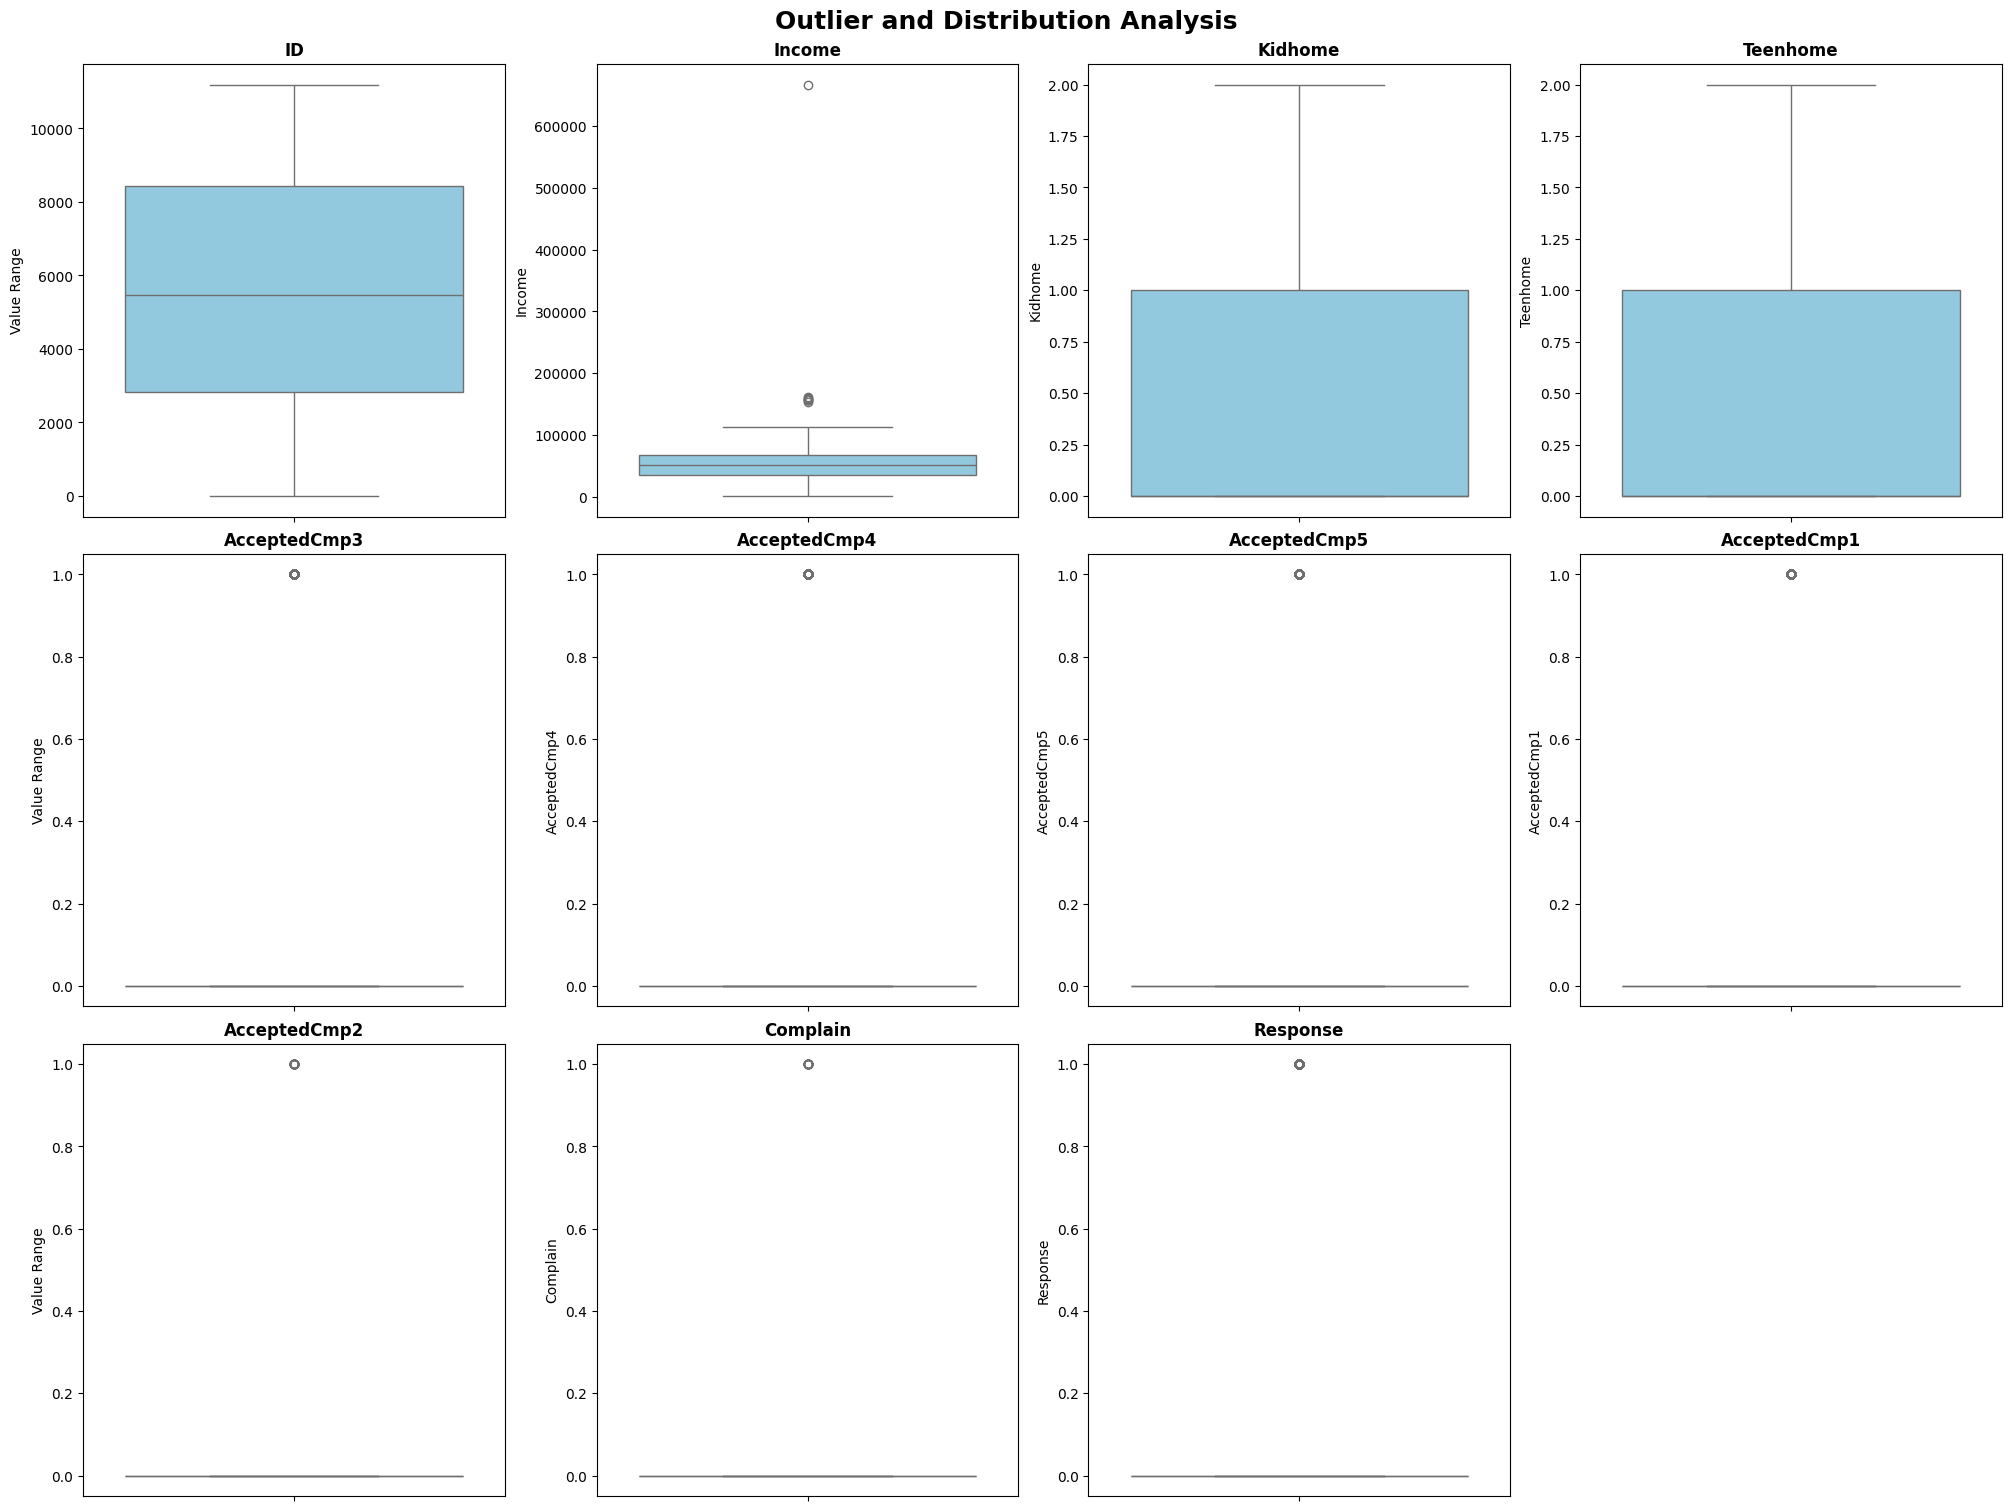

In [259]:
# Select only numeric columns
df_numeric = df.select_dtypes(include='number').columns.tolist()

# Exclude certain columns
excluded_columns = ['Year_Birth', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
                    'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
                    'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'Campaign_1',
                    'Campaign_4', 'Campaign_5', 'Campaign_1', 'Campaign_2', 'Campaign_3', 'Z_CostContact', 'Z_Revenue']

# Filter df_numeric to exclude the above columns
df_numeric = [col for col in df_numeric if col not in excluded_columns]

# Function to visualize distribution and detect outliers using boxplots
def visualize_distributions(df, features, layout=(4, 4), title='Outlier and Distribution Analysis', figsize=(20, 15)):

    # Calculate total plots required
    total_plots = len(features)

    # Adjust layout based on number of features
    rows = (total_plots + layout[1] - 1) // layout[1]  # Calculate rows dynamically
    cols = layout[1]

    # Initialize the figure
    fig = plt.figure(constrained_layout=True, figsize=figsize)
    fig.suptitle(title, fontsize=18, weight='bold')

    # Create subplots dynamically
    grid = fig.add_gridspec(rows, cols) # Update grid with adjusted rows

    for idx, feature in enumerate(features):
        ax = fig.add_subplot(grid[idx // cols, idx % cols])
        sns.boxplot(y=df[feature], ax=ax, orient='v', color='skyblue')
        ax.set_title(f'{feature}', fontsize=12, weight='semibold')
        if idx % cols == 0:
            ax.set_ylabel('Value Range', fontsize=10)

    # Adjust layout for better spacing
    plt.subplots_adjust(top=0.9, hspace=0.4)

# Example usage
visualize_distributions(df=df, features=df_numeric, layout=(4, 4), title='Outlier and Distribution Analysis')

##### From boxplot above, we can conclude that there are outlier in column income and birth year.

##### Check outlier from column income

In [260]:
df[df['Income']>200000]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
2233,9432,1977,Graduation,Together,666666.0,1,0,06-02-2013,23,9,14,18,8,1,12,4,3,1,3,6,0,0,0,0,0,0,3,11,0


##### Decided not to delete the outliers on the above because in reality there are people who earns more income that the average numbers

##### Check outliers in column birth_year.

In [261]:
df[df['Year_Birth']<1920]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
192,7829,1900,2n Cycle,Divorced,36640.0,1,0,2013-09-26 00:00:00,99,15,6,8,7,4,25,1,2,1,2,5,0,0,0,0,0,1,3,11,0
239,11004,1893,2n Cycle,Single,60182.0,0,1,2014-05-17 00:00:00,23,8,0,5,7,0,2,1,1,0,2,4,0,0,0,0,0,0,3,11,0
339,1150,1899,PhD,Together,83532.0,0,0,2013-09-26 00:00:00,36,755,144,562,104,64,224,1,4,6,4,1,0,0,1,0,0,0,3,11,0


##### Decided to delete the outliers, add a new column 'age' and categorized age.

In [262]:
import datetime  # Import the datetime module

# Get the current year
current_year = datetime.datetime.now().year

# Calculate age
df['Age'] = current_year - df['Year_Birth']

# Initialize 'Age_Group' column
df['Age_Group'] = ""

# Assigning age groups based on the given birth year ranges
for i, birth in enumerate(df['Year_Birth']):
    if 1997 <= birth <= 2012:
        df.loc[i, 'Age_Group'] = "Gen Z"
    elif 1981 <= birth <= 1996:
        df.loc[i, 'Age_Group'] = "Millennials"
    elif 1965 <= birth <= 1980:
        df.loc[i, 'Age_Group'] = "Gen X"
    elif 1955 <= birth <= 1964:
        df.loc[i, 'Age_Group'] = "Boomers II"
    elif 1946 <= birth <= 1954:
        df.loc[i, 'Age_Group'] = "Boomers I"

# Check the distribution of Age Groups
print(df['Age_Group'].value_counts())

Age_Group
Gen X          1069
Boomers II      467
Millennials     385
Boomers I       292
                 27
Name: count, dtype: int64


### For easier reading, we will rename some of the columns below:

In [263]:
# Define a dictionary with original column names as keys and readable names as values

rename_dict = {
    'ID': 'Customer_ID',
    'Year_Birth': 'Birth year',
    'Marital_Status': 'Relationship status',
    'Recency': 'Last_Purchase',
    'MntWines': 'Wines',
    'MntFruits': 'Fruits',
    'MntMeatProducts': 'Meat',
    'MntFishProducts': 'Fish',
    'MntSweetProducts': 'Sweet',
    'MntGoldProds': 'Gold',
    'AcceptedCmp1': 'Campaign_1',
    'AcceptedCmp2': 'Campaign_2',
    'AcceptedCmp3': 'Campaign_3',
    'AcceptedCmp4': 'Campaign_4',
    'AcceptedCmp5': 'Campaign_5',
    'NumDealsPurchases': 'Purchase_with_discounts',
    'NumWebPurchases': 'Web_Purchase',
    'NumCatalogPurchases': 'Catalog_Purchases',
    'NumStorePurchases': 'Store_Purchases',
    'NumWebVisitsMonth': 'Web_Visits',
    'Complain': 'Customer_Complaints',
    'Z_CostContact': 'Cost_of_Contact',
    'Z_Revenue': 'Revenue',
    'Response': 'Overall_Response'
}

# Rename the columns in the DataFrame
df.rename(columns=rename_dict, inplace=True)

# Display the first few rows to verify the changes
df.head()

,Customer_ID,Birth year,Education,Relationship status,Income,Kidhome,Teenhome,Dt_Customer,Last_Purchase,Wines,Fruits,Meat,Fish,Sweet,Gold,Purchase_with_discounts,Web_Purchase,Catalog_Purchases,Store_Purchases,Web_Visits,Campaign_3,Campaign_4,Campaign_5,Campaign_1,Campaign_2,Customer_Complaints,Cost_of_Contact,Revenue,Overall_Response,Age,Age_Group
0,5524,1957,Graduation,Single,58138.0,0,0,09-04-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,67,Boomers II
1,2174,1954,Graduation,Single,46344.0,1,1,03-08-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,70,Boomers I
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21 00:00:00,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,59,Gen X
3,6182,1984,Graduation,Together,26646.0,1,0,02-10-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,40,Millennials
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19 00:00:00,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,43,Millennials


### We will also categorize column "relationship status" and "education.

##### Categorize column "Education" as the following:


*   Undergraduate : Graduation
*   School : Basic
*   Postgraduate : 2n cycle, PhD and Master




In [264]:
# Convert 'Education' to lowercase to ensure consistency
df['Education'] = df['Education'].str.lower()

# Define the mapping
education_mapping = {
    'graduation': 'Undergraduate',
    'basic': 'School',
    '2n cycle': 'Postgraduate',
    'phd': 'Postgraduate',
    'master': 'Postgraduate'
}

# Apply the mapping to create a new categorized column
df['Education'] = df['Education'].map(education_mapping)

##### Categorize column "Relationship Status" as the following:


*   Single - absurd, alone, divorced, single, yolo and widow
*   In relationship - married and together



In [265]:
# Convert Relationship status to lowercase to ensure consistency
df.loc[:,'Relationship status'] = df['Relationship status'].str.lower()

# Define the mapping
status_mapping = {
    'absurd': 'Single',
    'alone': 'Single',
    'divorced': 'Single',
    'single': 'Single',
    'widow': 'Single',
    'yolo': 'Single',
    'married': 'In relationship',
    'together': 'In relationship'
}

# Apply the mapping to create a new categorized column
df.loc[:, 'Relationship_Status'] = df['Relationship status'].map(status_mapping)
df.drop('Relationship status', axis=1, inplace=True)



# Check the result
df['Relationship_Status'].value_counts()

,count
Relationship_Status,
In relationship,1444
Single,796


##### Create new column "Children" which is the total of kidhome and teenhome column. And delete the column kidhome and teenhome. Also create new column "total purchase" to display the total of purchase.

In [266]:
# Check if the required coumns exist
if all(col in df.columns for col in ['Kidhome', 'Teenhome', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold']):

    # Create 'Children' column
    df['Children'] = df['Kidhome'] + df['Teenhome']

    # Create 'Total_Purchase' column
    df['Total_Purchase'] = df[['Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold']].sum(axis=1)

    # Drop 'Number_of_Kids' and 'Number_of_Teens' columns
    df.drop(columns=['Kidhome', 'Teenhome'], inplace=True)

    # Display the result
    print(df[['Children', 'Total_Purchase']].head())

df

   Children  Total_Purchase
0         0            1617
1         2              27
2         0             776
3         1              53
4         1             422


,Customer_ID,Birth year,Education,Income,Dt_Customer,Last_Purchase,Wines,Fruits,Meat,Fish,Sweet,Gold,Purchase_with_discounts,Web_Purchase,Catalog_Purchases,Store_Purchases,Web_Visits,Campaign_3,Campaign_4,Campaign_5,Campaign_1,Campaign_2,Customer_Complaints,Cost_of_Contact,Revenue,Overall_Response,Age,Age_Group,Relationship_Status,Children,Total_Purchase
0,5524,1957,Undergraduate,58138.0,09-04-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1,67,Boomers II,Single,0,1617
1,2174,1954,Undergraduate,46344.0,03-08-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0,70,Boomers I,Single,2,27
2,4141,1965,Undergraduate,71613.0,2013-08-21 00:00:00,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0,59,Gen X,In relationship,0,776
3,6182,1984,Undergraduate,26646.0,02-10-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0,40,Millennials,In relationship,1,53
4,5324,1981,Postgraduate,58293.0,2014-01-19 00:00:00,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0,43,Millennials,In relationship,1,422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Undergraduate,61223.0,2013-06-13 00:00:00,46,709,43,182,42,118,247,2,9,3,4,5,0,0,0,0,0,0,3,11,0,57,Gen X,In relationship,1,1341
2236,4001,1946,Postgraduate,64014.0,06-10-2014,56,406,0,30,0,0,8,7,8,2,5,7,0,0,0,1,0,0,3,11,0,78,Boomers I,In relationship,3,444
2237,7270,1981,Undergraduate,56981.0,2014-01-25 00:00:00,91,908,48,217,32,12,24,1,2,3,13,6,0,1,0,0,0,0,3,11,0,43,Millennials,Single,0,1241
2238,8235,1956,Postgraduate,69245.0,2014-01-24 00:00:00,8,428,30,214,80,30,61,2,6,5,10,3,0,0,0,0,0,0,3,11,0,68,Boomers II,In relationship,1,843


##### Create new column "Income_Category"

In [267]:
# Sample DataFrame creation (assuming df is already defined)
# df = pd.read_csv('your_file.csv')  # Uncomment and modify if reading from a file

# Define income bins and labels
bins = [1730, 35694, 51650, 68277.5, 162397]
labels = ['Low', 'Middle', 'High', 'Very High']

# Create the 'Income_Category' column based on the defined bins
df['Income_Category'] = pd.cut(df['Income'], bins=bins, labels=labels, right=False)

# Display the result
print(df[['Income', 'Income_Category']].head())

    Income Income_Category
0  58138.0            High
1  46344.0          Middle
2  71613.0       Very High
3  26646.0             Low
4  58293.0            High


In [268]:

product_columns = ['Wines', 'Meat', 'Gold', 'Fish', 'Sweet', 'Fruits']

# Create a list to store product types for each customer
all_product_types = []

# Iterate over each row in the DataFrame
for _, row in df.iterrows():
    # Determine the product types purchased by the customer (example logic)
    customer_product_types = [product for product in product_columns if row[product] > 0]
    all_product_types.append(customer_product_types)

# Assign the list of product types to the 'Product_Types' column
df['Product_Types'] = all_product_types

df['Product_Types']

,Product_Types
0,"[Wines, Meat, Gold, Fish, Sweet, Fruits]"
1,"[Wines, Meat, Gold, Fish, Sweet, Fruits]"
2,"[Wines, Meat, Gold, Fish, Sweet, Fruits]"
3,"[Wines, Meat, Gold, Fish, Sweet, Fruits]"
4,"[Wines, Meat, Gold, Fish, Sweet, Fruits]"
...,...
2235,"[Wines, Meat, Gold, Fish, Sweet, Fruits]"
2236,"[Wines, Meat, Gold]"
2237,"[Wines, Meat, Gold, Fish, Sweet, Fruits]"
2238,"[Wines, Meat, Gold, Fish, Sweet, Fruits]"


### Data Visualisation

In [269]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Customer_ID              2240 non-null   int64   
 1   Birth year               2240 non-null   int64   
 2   Education                2240 non-null   object  
 3   Income                   2240 non-null   float64 
 4   Dt_Customer              2240 non-null   object  
 5   Last_Purchase            2240 non-null   int64   
 6   Wines                    2240 non-null   int64   
 7   Fruits                   2240 non-null   int64   
 8   Meat                     2240 non-null   int64   
 9   Fish                     2240 non-null   int64   
 10  Sweet                    2240 non-null   int64   
 11  Gold                     2240 non-null   int64   
 12  Purchase_with_discounts  2240 non-null   int64   
 13  Web_Purchase             2240 non-null   int64   
 14  Catalog_

### Commonly Purchased Products Together and How to Use This to Increase Sales

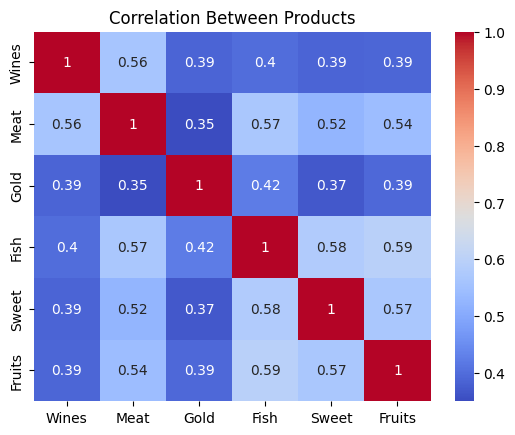

In [270]:
# Correlation matrix for products to find products that are often purchased together
corr = df[product_columns].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Between Products')
plt.show()

##### From above chart, we can conclude the following:

- *Wines:*
  - Positively correlated with Meat (0.56), meaning when customers buy wines, they are somewhat likely to buy meat as well.
  - Lower correlations with Gold (0.39), Fish (0.41), Sweet (0.42), and Fruits (0.41).

- *Meat:*
  - Stronger positive correlations with Fish (0.57) and Wines (0.56).
  - Moderate correlations with Sweet (0.53), Fruits (0.54), and lower with Gold (0.33).

- *Gold:*
  - Weak positive correlations with all other products, with the highest being with Fish (0.43).

- *Fish:*
  - Strongest positive correlation with Fruits (0.61), indicating that customers who buy Fish often buy Fruits as well.
  - Also has a strong correlation with Sweet (0.59) and Meat (0.57).

- *Sweet:*
  - Moderate to strong correlations with all products, especially Fish (0.59) and Fruits (0.58).

- *Fruits:*
  - Highest correlation with Fish (0.61), followed by Sweet (0.58) and Meat (0.54).

In summary, customers who purchase one product tend to purchase related products, as indicated by the positive correlations. The strongest correlations are between Fish and Fruits, and Fish and Sweet, which suggests these items are often bought together. Conversely, Gold has the weakest correlations with other products, indicating it's less commonly purchased alongside these items.

### Products with the Highest and Lowest Sales Rate

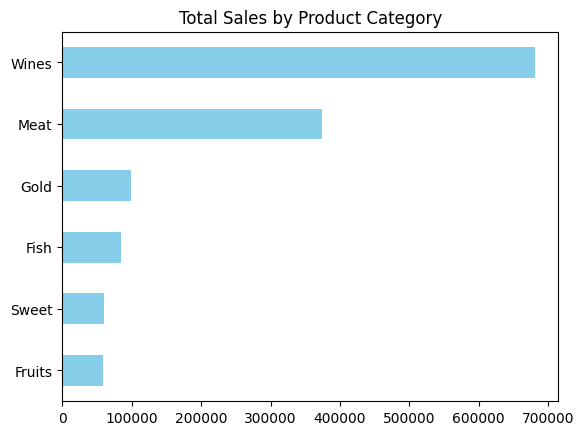

In [271]:
# Bar plot for total sales of each product category
total_sales = df[product_columns].sum()
total_sales.sort_values().plot(kind='barh', color='skyblue')
plt.title('Total Sales by Product Category')
plt.show()

##### Interpretation:


*   The sales of wines far exceed those of all other categories, indicating that this product category is either highly demanded or commands a higher price, leading to greater revenue.
*   Meat also performs well but does not come close to wines. This suggests that while it is popular, it might be either less in demand or lower priced compared to wines.
*  These three categories have very similar sales, indicating that they might be similarly priced or equally demanded.
* Fruits have the lowest sales, which might indicate less demand or lower prices compared to other categories



In [272]:
import seaborn as sns
import matplotlib.pyplot as plt

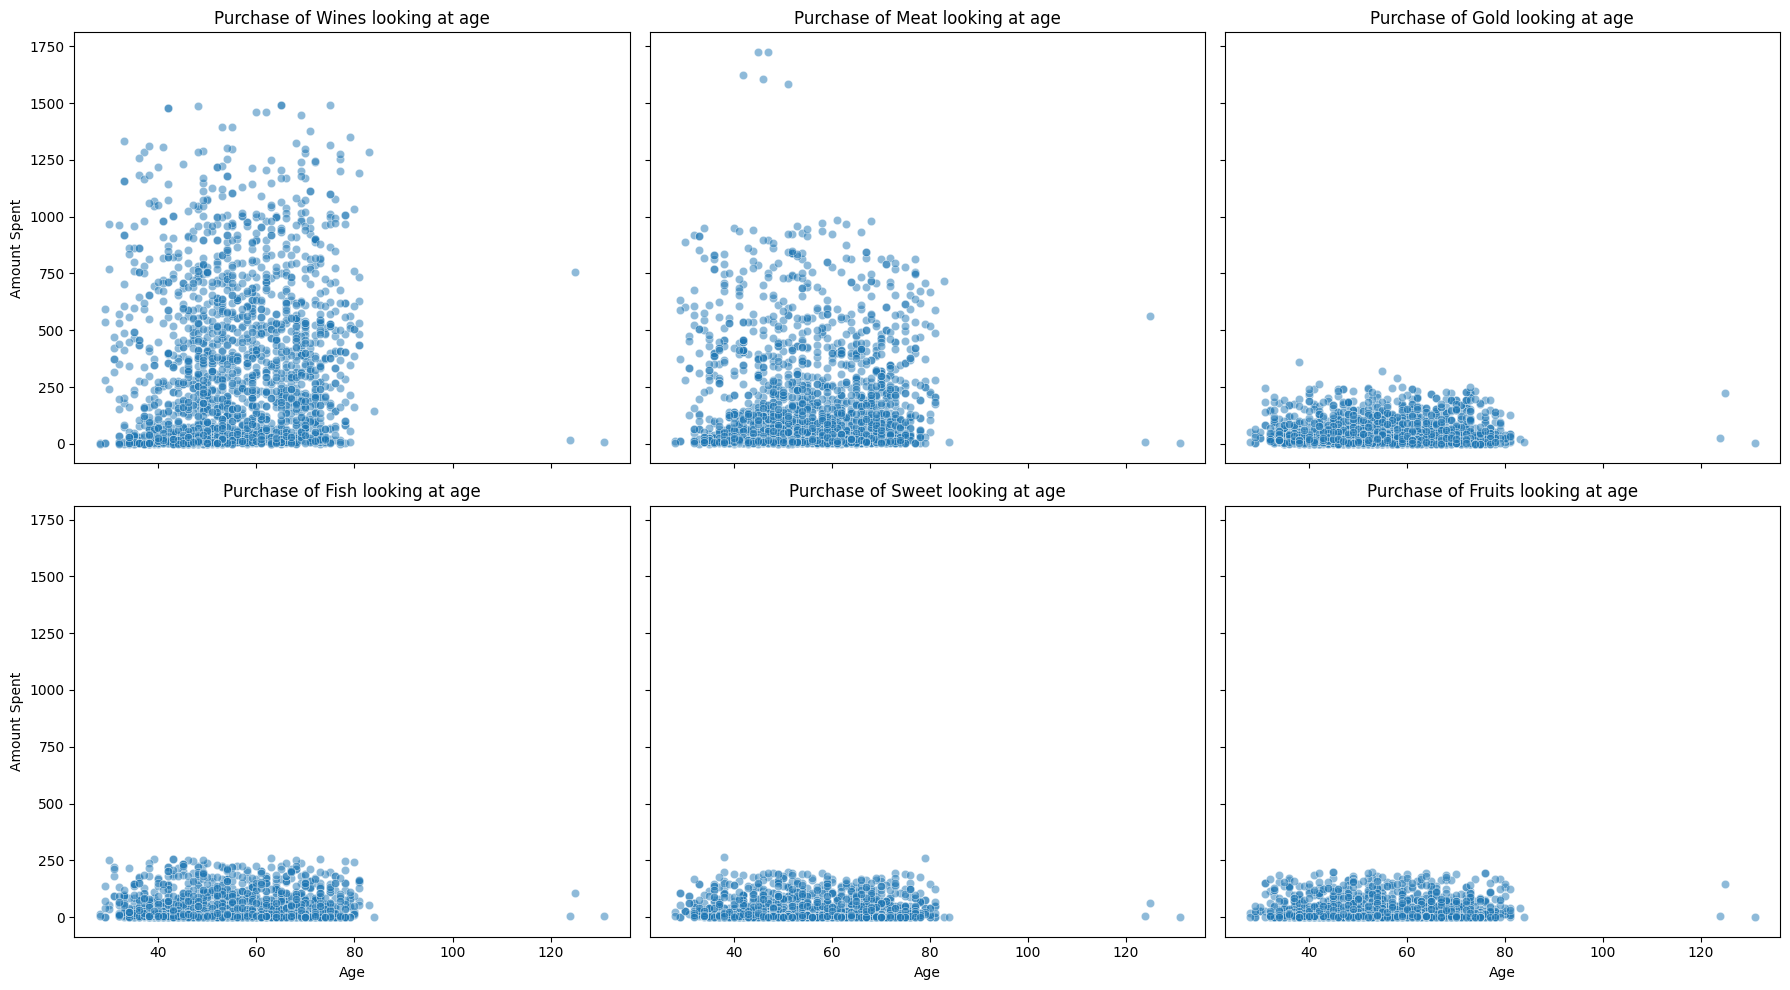

In [273]:
# Create scatter plots for each product category looking at age
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10), sharex=True, sharey=True)
axes = axes.flatten()

for ax, product in zip(axes, product_columns):
    sns.scatterplot(data=df, x='Age', y=product, ax=ax, alpha=0.5)
    ax.set_title(f'Purchase of {product} looking at age')
    ax.set_xlabel('Age')
    ax.set_ylabel('Amount Spent')

plt.tight_layout()
plt.show()


##### We can conclude the following from above scatter plot:


*   younger individuals tend to have a wide range of spending on wines, with a high concentration of data points around the lower spending amounts, especially for people under 50. As age increases, the spread of spending seems to reduce slightly, but there are still individuals in older age groups who spend significant amounts on wine.
*   Similar to wine purchases, younger customers have a wide range of spending habits, with a dense cluster of lower spending. As age increases, the distribution remains relatively consistent, with a slight tapering off in higher spending in older age groups.
*   The spending on gold is more sporadic across age groups, with most data points showing lower spending across all ages. There are very few high-spending outliers, and the data points seem more concentrated towards lower spending amounts, regardless of age.
*   The pattern here is similar to the other plots, with younger individuals showing more variability in spending. However, the majority of customers, regardless of age, tend to spend lower amounts on fish, with a dense cluster of data points at lower spending levels.
*   The spending on sweets is concentrated at lower amounts across all age groups. There are few instances of high spending, and the overall trend shows that people of all ages tend to spend modestly on sweets.
*    Similar to the other categories, the spending on fruits is mostly concentrated at lower amounts. There is some spread in spending among younger age groups, but the overall trend is consistent across different ages, with a dense cluster at lower spending levels.



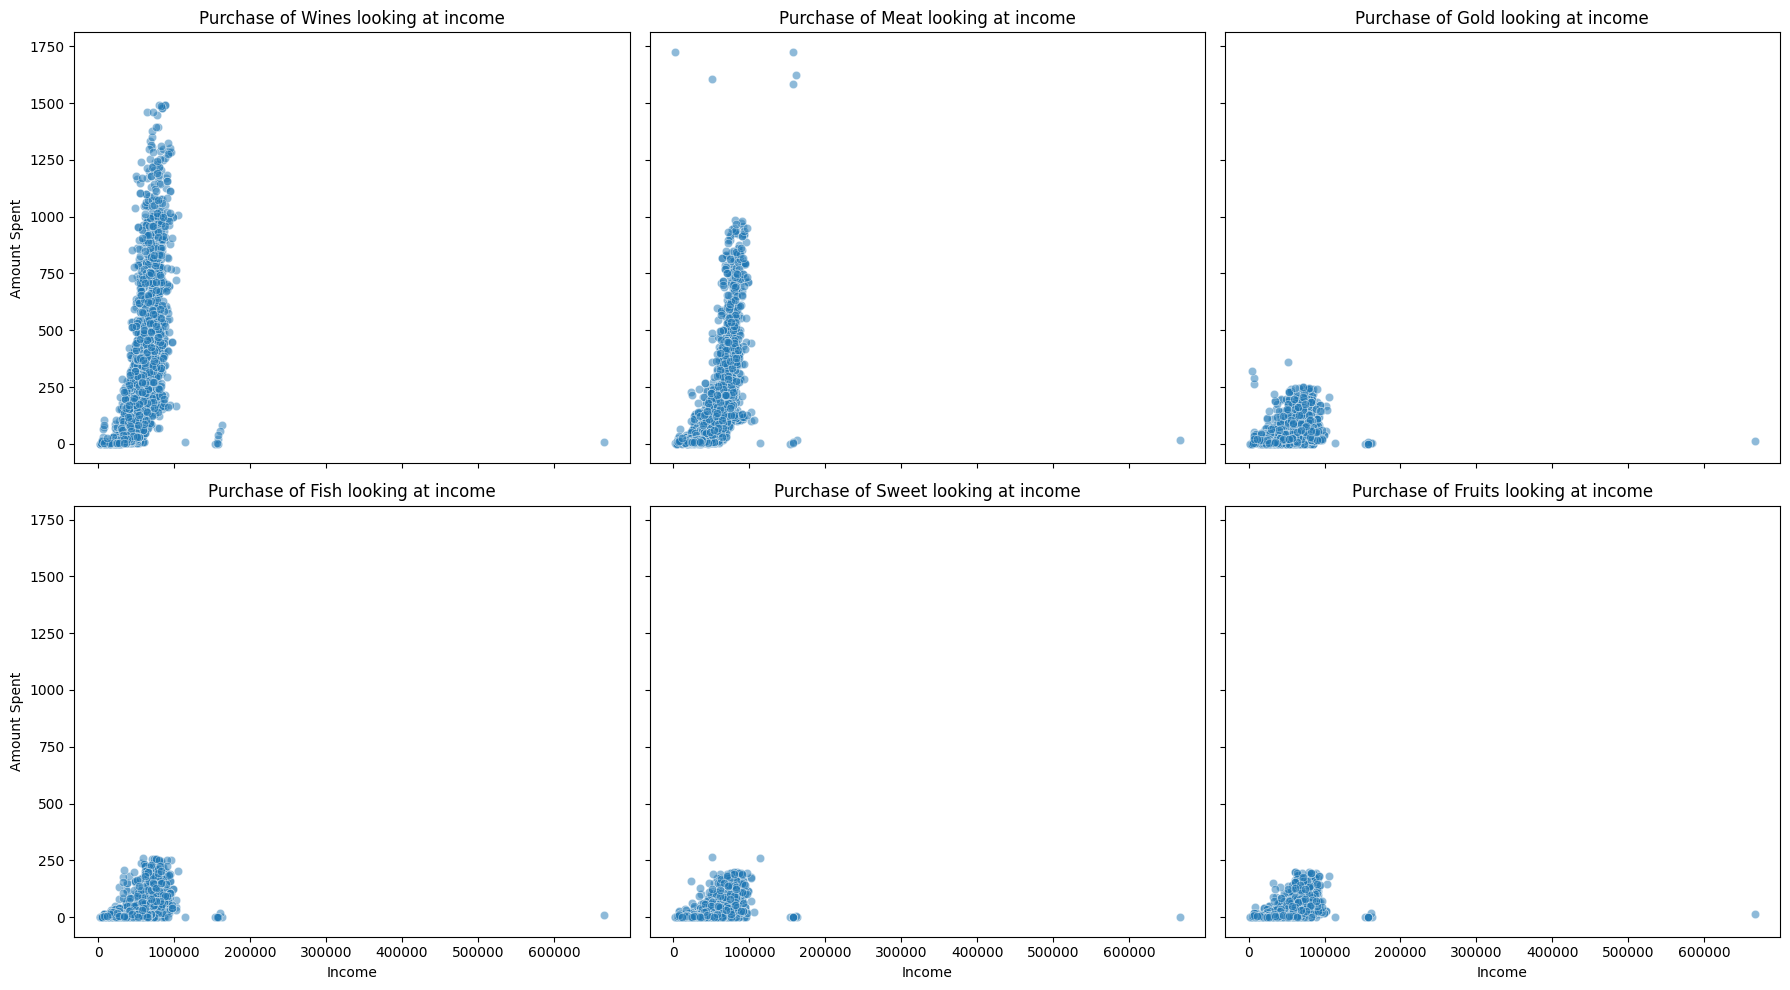

In [274]:
# Create scatter plots for each product category looking at income
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10), sharex=True, sharey=True)
axes = axes.flatten()

for ax, product in zip(axes, product_columns):
    sns.scatterplot(data=df, x='Income', y=product, ax=ax, alpha=0.5)
    ax.set_title(f'Purchase of {product} looking at income')
    ax.set_xlabel('Income')
    ax.set_ylabel('Amount Spent')

plt.tight_layout()
plt.show()

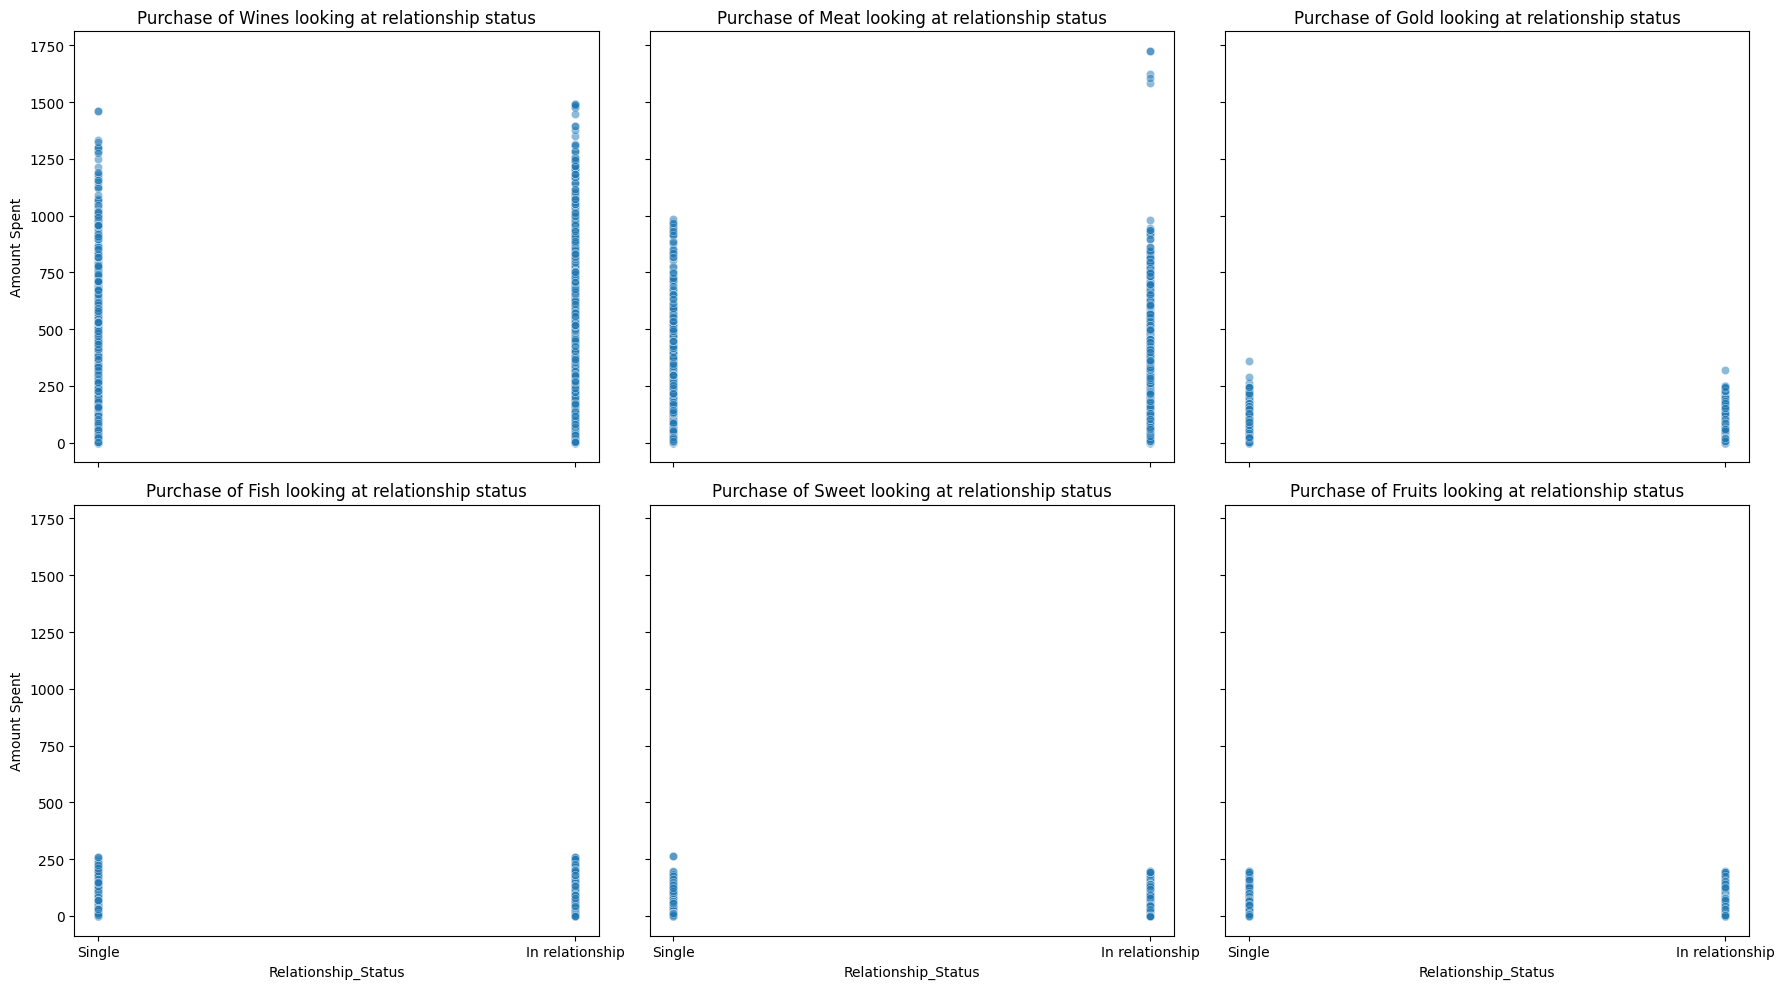

In [275]:
# Create scatter plots for each product category looking at relationship status
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10), sharex=True, sharey=True)
axes = axes.flatten()

for ax, product in zip(axes, product_columns):
    sns.scatterplot(data=df, x='Relationship_Status', y=product, ax=ax, alpha=0.5)
    ax.set_title(f'Purchase of {product} looking at relationship status')
    ax.set_xlabel('Relationship_Status')
    ax.set_ylabel('Amount Spent')

plt.tight_layout()
plt.show()

In [276]:
# Assuming 'df' is your DataFrame
df.to_csv('capstone_project_2.csv', index=False)
df.to_excel('capstone_project_2.xlsx', index=False)